# Задача для поступления на кафедру 1С. Тема --- Анализ Данных

#### Семенов Богдан. Б05-811. e-mail: Semenov.BV@phystech.edu,      vk: https://vk.com/s_bogdan_v

In [147]:
# data analysis
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit
from datetime import timedelta
import datetime 
from datetime import datetime
import matplotlib.dates as mdates

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 12)

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')

# Визуализация

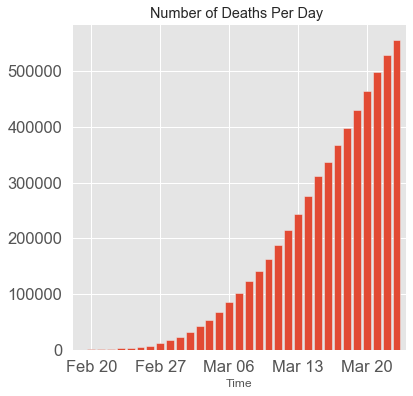

In [149]:
df1 = df.copy()

df1.set_index('date', inplace=True)

df1 = df1.groupby(['date']).agg({
    'cases': 'sum'
})
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(df1.index.values, 
       df1['cases'])

ax.set(title = "Number of Deaths Per Day",
       xlabel = "Time",
      xlim = ["2020-03-10", "2020-04-16"])

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

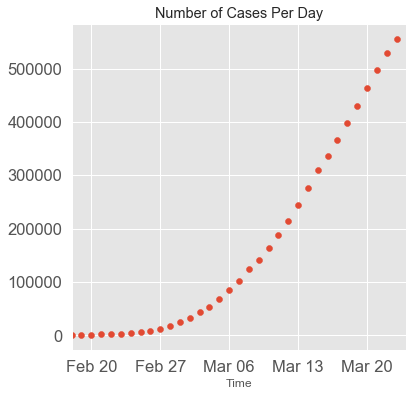

In [153]:
df2 = df.copy()

df2.set_index('date', inplace=True)

df2 = df2.groupby(['date']).agg({
    'cases': 'sum'
})

fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(df2.index.values, 
      df2['cases'])

ax.set(title = "Количество случаев в день", 
      xlabel = "Время", 
      xlim = ['2020-03-10', '2020-04-16'])

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Анализ Данных

In [165]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [157]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53848 entries, 0 to 53847
Data columns (total 6 columns):
date      53848 non-null object
county    53848 non-null object
state     53848 non-null object
fips      53132 non-null float64
cases     53848 non-null int64
deaths    53848 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


In [158]:
df.describe()

,fips,cases,deaths
count,53132.000000,53848.000000,53848.000000
mean,29529.152036,106.149328,3.178985
std,15549.107764,1336.965313,65.751445
min,1001.000000,0.000000,0.000000
25%,17161.000000,2.000000,0.000000
50%,28135.000000,5.000000,0.000000
75%,42125.000000,22.000000,1.000000
max,56043.000000,103208.000000,6717.000000


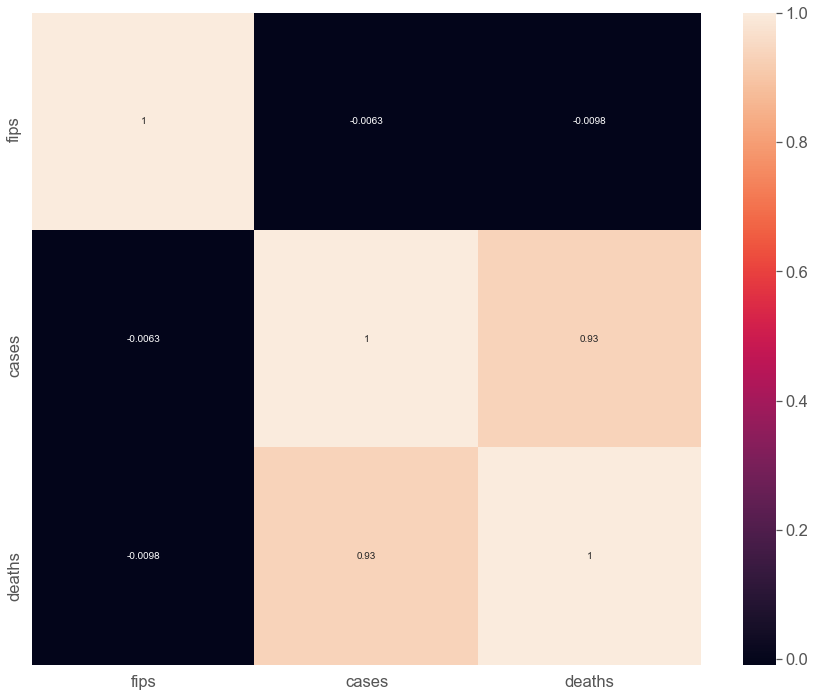

In [159]:
sns.heatmap(df.corr(), annot=True);

In [127]:
df.isnull().sum()

date        0
county      0
state       0
fips      716
cases       0
deaths      0
dtype: int64

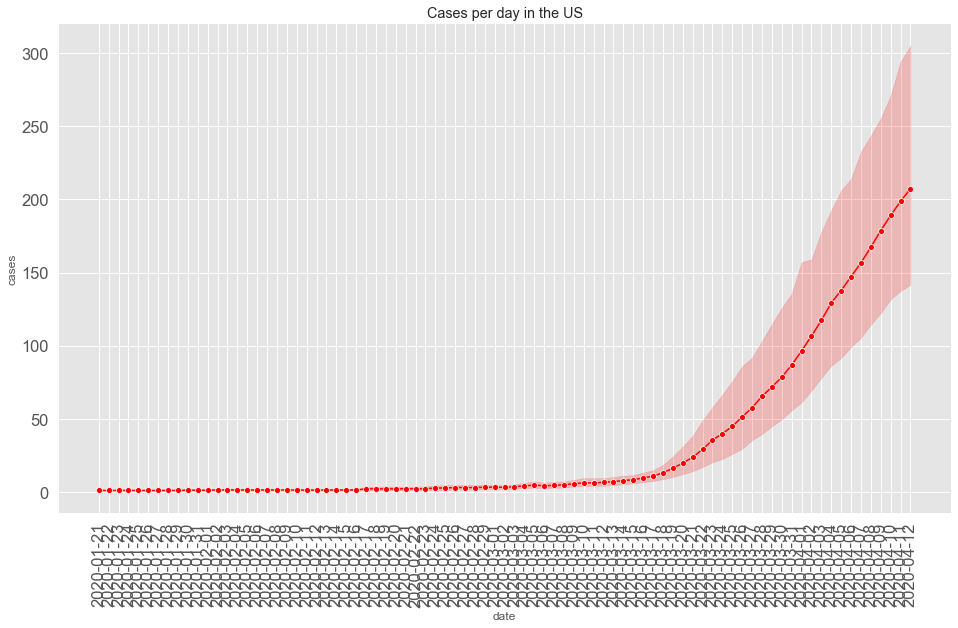

In [160]:
plt.figure(figsize=(16,9))
sns.lineplot(x='date', y='cases', data=df, marker='o', color='red') 
plt.title('Cases per day in the US') 
plt.xticks(df.date.unique(), rotation=90)
plt.show()

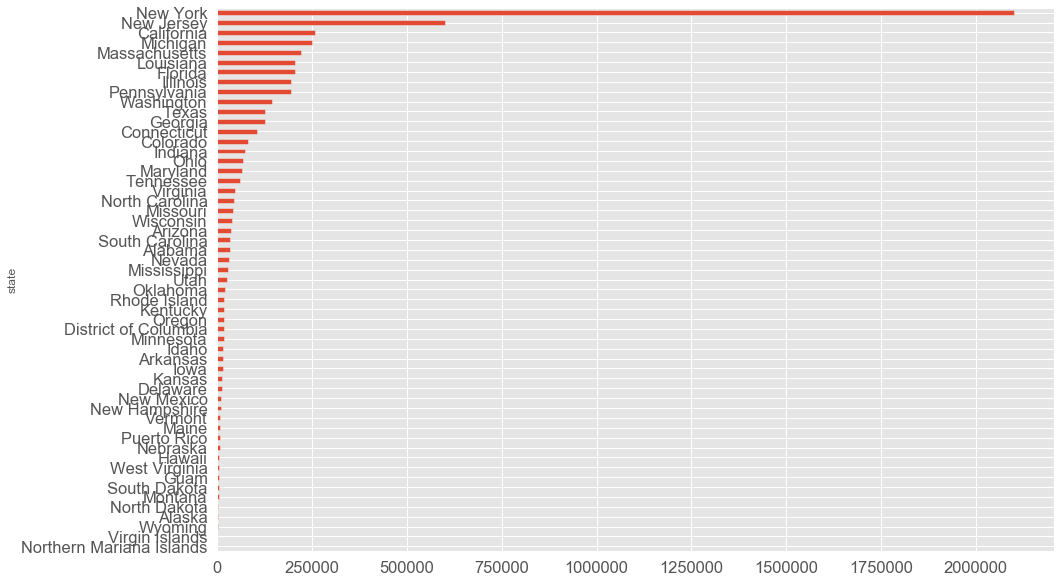

In [161]:
df.groupby("state").cases.sum().sort_values().plot(kind="barh", figsize=(15,10));

# Предсказание

In [177]:
# exp(ax)

def func(x, A, B, C):
    return A * np.exp(B * (x - C)**2)

### Функция, которая предсказывает по округу и городу

In [180]:
def predict_for_target(county, state):
    subject_data = df[(df.loc[:, 'county'] == county) & (df.loc[:, 'state'] == state) & df.loc[:, 'cases'].notnull()]
    subject_data.index = list(range(len(subject_data)))
    popt, pcov = curve_fit(func, subject_data.index, subject_data.loc[:, 'cases'],  (100000, -0.005, len(subject_data)), maxfev=10**6)
    A, B, C = popt
    f = plt.figure()
    days = subject_data.index
    s = plt.scatter(days, subject_data.loc[:, 'cases'])
    s = plt.scatter(days, A * np.exp(B * (days - C) * (days - C)))
    return func(len(subject_data) + 3, A, B, C)

Предсказание для количества заболевших: 


106291.8466683223

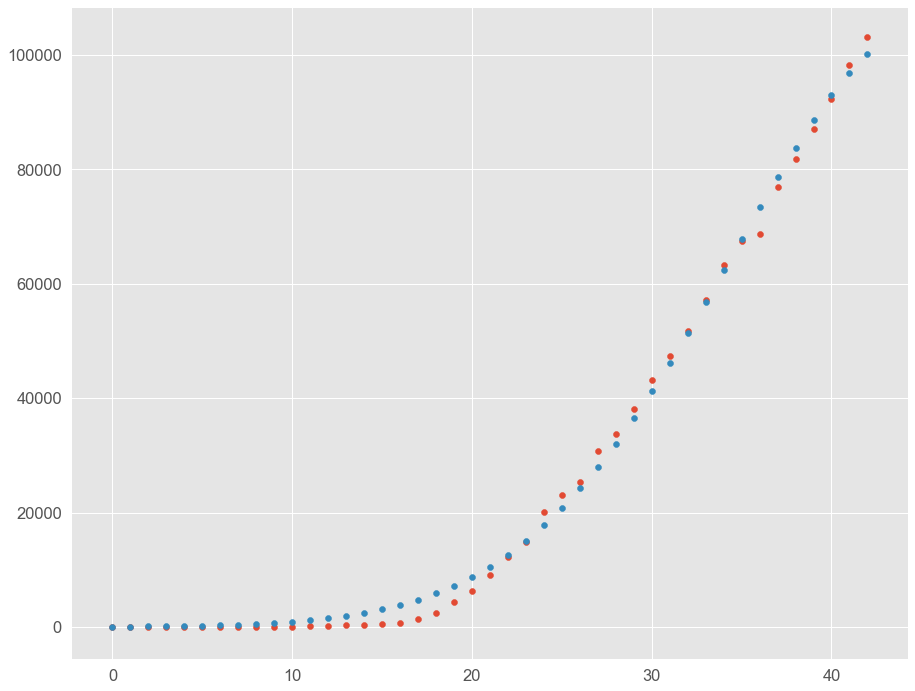

In [182]:
print("Предсказание для количества заболевших в : ")
predict_for_target('New York City', 'New York')

1720.0309214859485

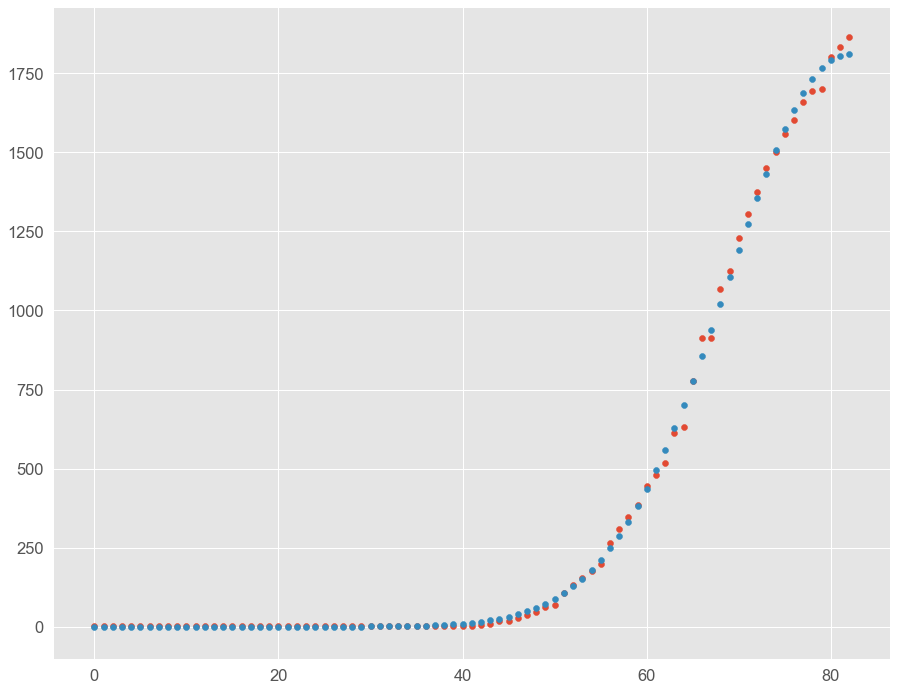

In [186]:
predict_for_target('Snohomish', 'Washington')